In [37]:
# Import Libraries

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import statsmodels.api as sm
import statsmodels.formula.api as smf
import numpy as np
import scipy.stats
import math
import seaborn as sns
import statsmodels.formula.api as smf
from pandas.api.types import CategoricalDtype
import warnings

warnings.filterwarnings("ignore")
%config InlineBackend.figure_format = 'retina'

In [39]:
# Load data for Time Series explanation

time_series = pd.read_csv("DailyDelhiClimateTrain.csv")

# Linear regression study session
* Two students have an upcoming project they are preparing for.


* Some concepts they're comfortable with, some not so much.


* The students will use a study sheet and their TA for help.  

## Topic 1 - Regression and time-series data 
- Can the following time-series data be used for regression?

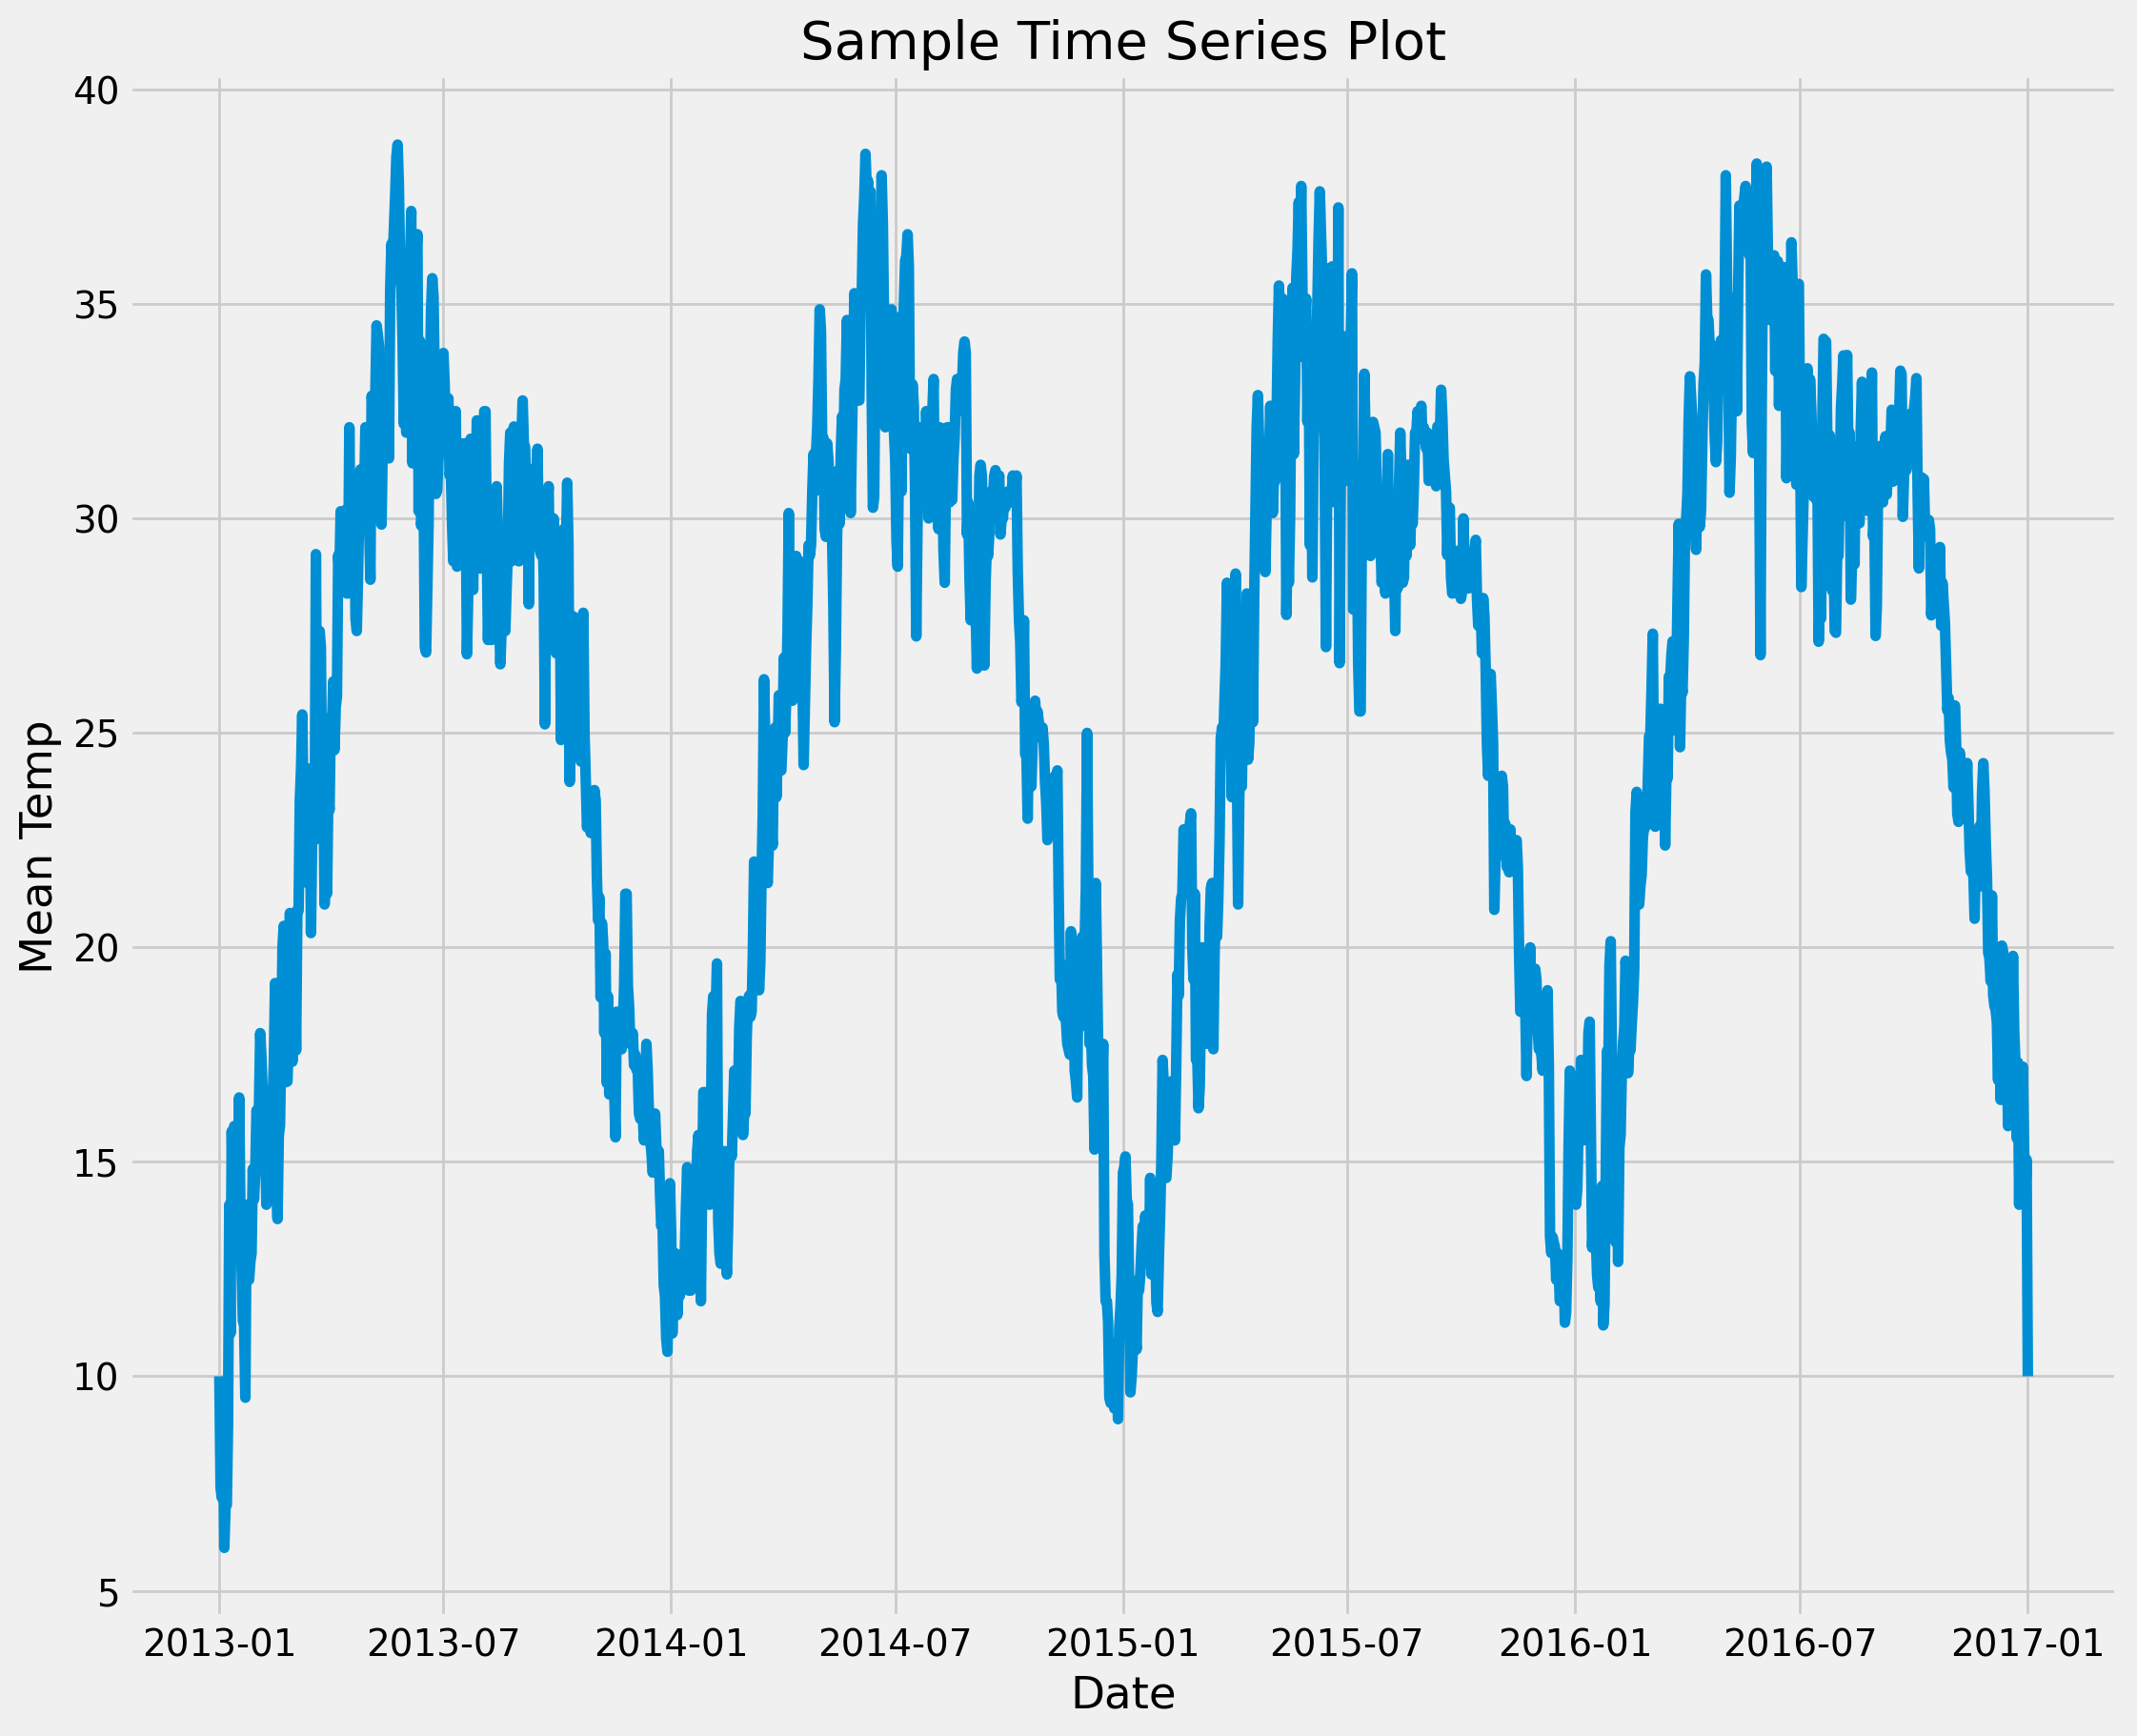

In [9]:
# Time Series Data

time_series["date"] = time_series["date"].astype("datetime64")
dataframe = time_series.set_index("date")
plt.style.use("fivethirtyeight")
plt.figure(figsize=(12, 10))
plt.xlabel("Date")
plt.ylabel("Mean Temp")
plt.title("Sample Time Series Plot")
plt.plot(dataframe["meantemp"])
plt.show()

# Time Series data is not suitable for Linear Regression
- In Time Series, a given observation will influence all the observations that come after it


- Time Series has a cyclical component


- Dependence of errors (residuals are not random) exist in Time series


- Time series data violates assumption of independent errors

## Topic 2 - Violation of Assumptions - Transformations
- How do we work around few assumption violations while performing linear regression?

### We use tranformations to work around assumption violations in regression

We apply a nonlinear transformation to the independent and/or dependent variable when we encounter violations in the following assumptions

1. Normality

2. Homoscedasticity

3. Linearity

### What is a transformation?

A transformation applies a math operation to a variable. 

Common examples of transformations include taking the log, the square root, or the reciprocal of the independent and/or dependent variable

#### Nonlinear transformations change linear correlation. 

- A linear transformation neither increases nor decreases the linear relationship between variables; It preserves the correlation. 

- A **nonlinear** transformation can increase/decrease the relationship between variables.

### In regression, we use nonlinear transformations to achieve linearity for better regression analysis

- Increase correlation: Better Regression. 
- Reduce correlation: Worse regression.  


## Violation in Normality
The residuals of the model are not normally distributed. This means the distribution of our dependent variable is not normally distributed.

### Transformations can make distributions normal
- Below is an example of how applying transformation improves normality

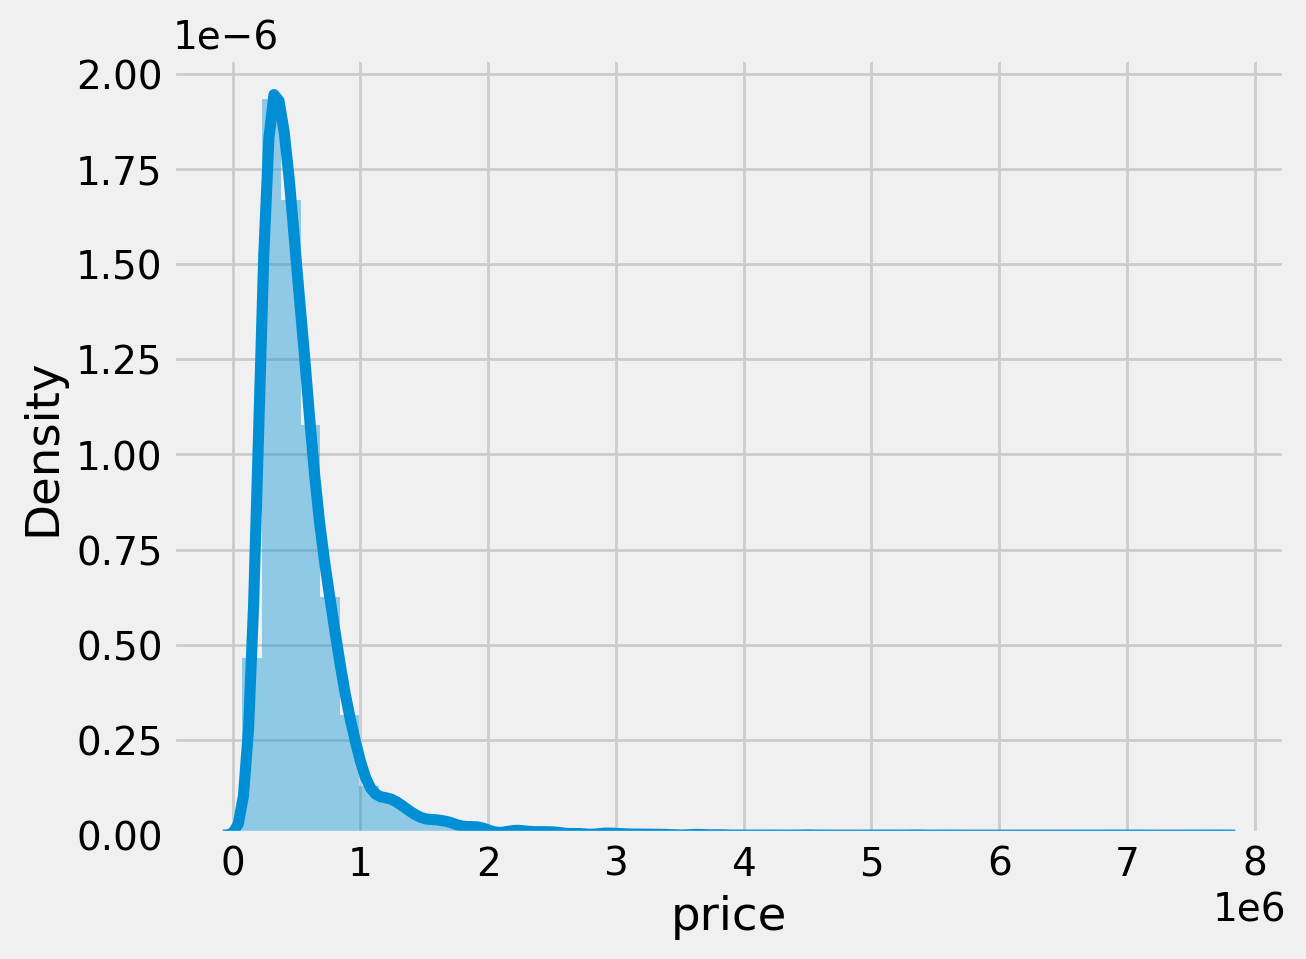

<Figure size 640x480 with 0 Axes>

In [16]:
# Load Data

df = pd.read_csv('kc_house_data.csv')
sns.distplot(df['price'])
fig = plt.figure()

Transformation: $\sqrt{y}$

- Applying square root transformation improve normality

<AxesSubplot:xlabel='sqrt_price', ylabel='Density'>

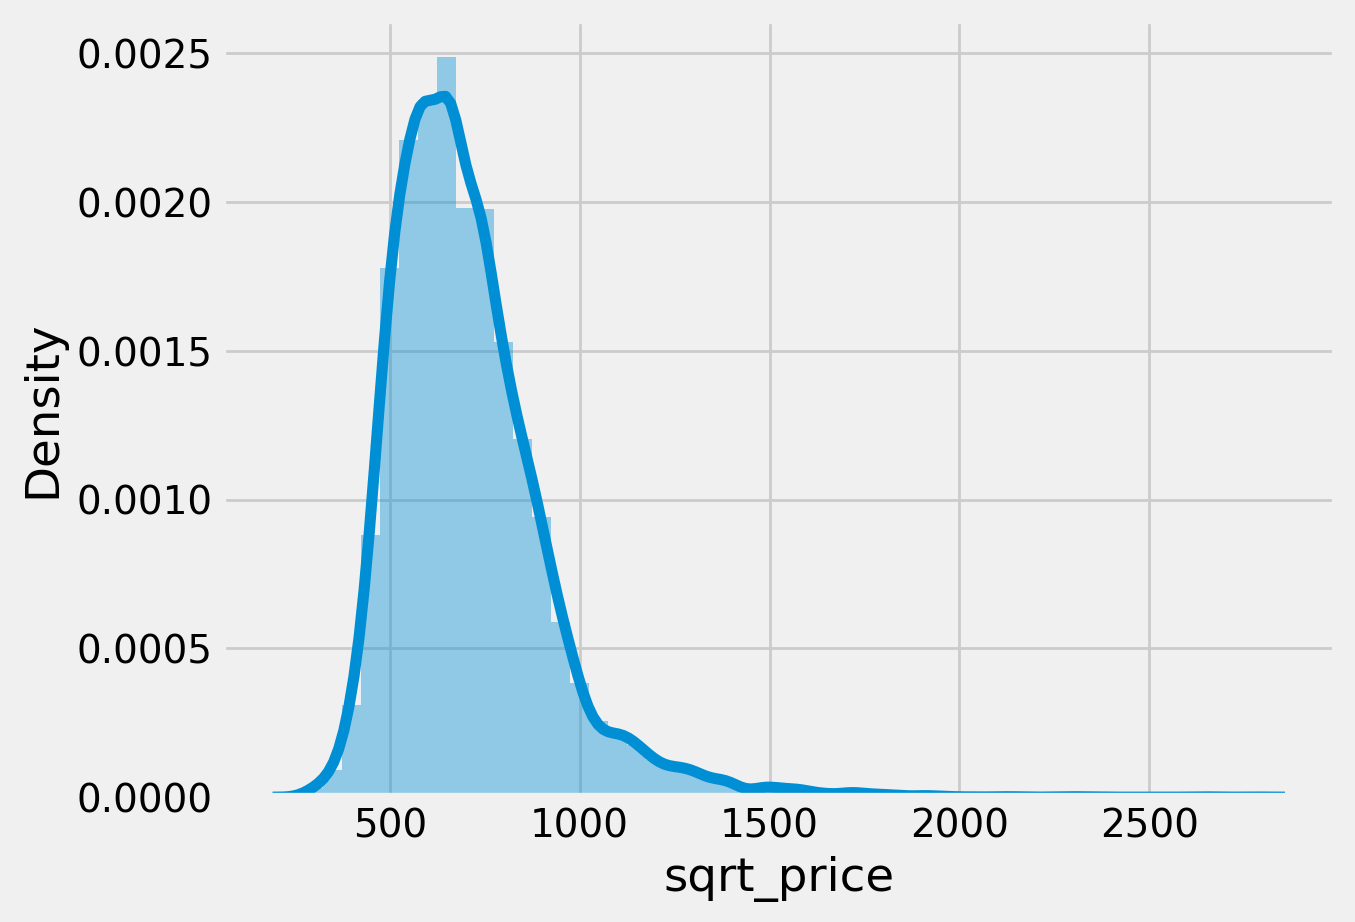

In [20]:
# Square root Transformation to make the distribution of variable normal

df["sqrt_price"] = df["price"] ** 0.5
sns.distplot(df["sqrt_price"])

Transformation: ${log(y)}$

- Applying log transformation improve normality

<AxesSubplot:xlabel='log_price', ylabel='Density'>

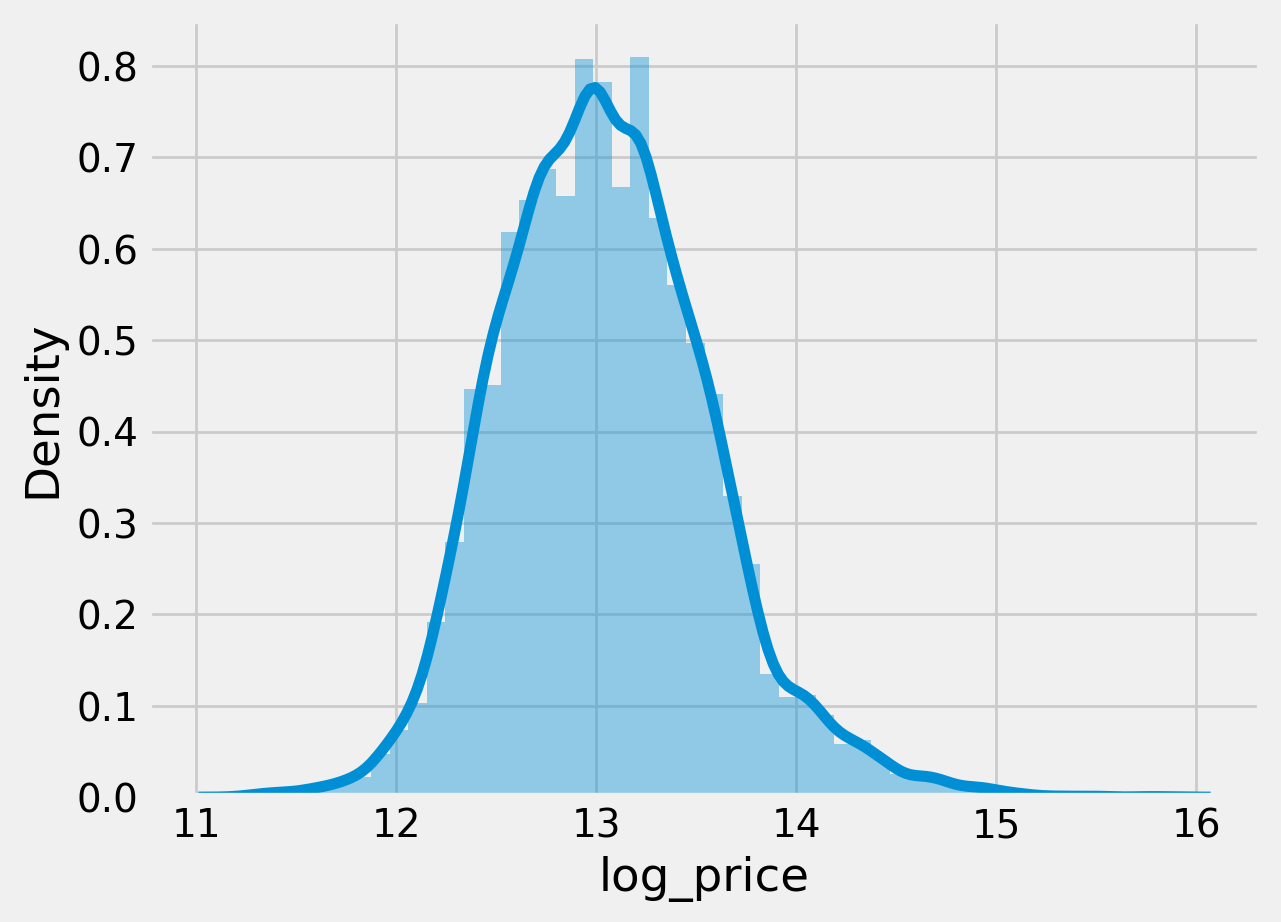

In [21]:
# Log Transformation to make the distribution of variable normal

df["log_price"] = np.log(df["price"])
sns.distplot(df["log_price"])

## Homoscedasticity

The residuals do not have constant variance at every level of x. 

Text(0.5, 1.0, 'Fitted Values vs. Residuals')

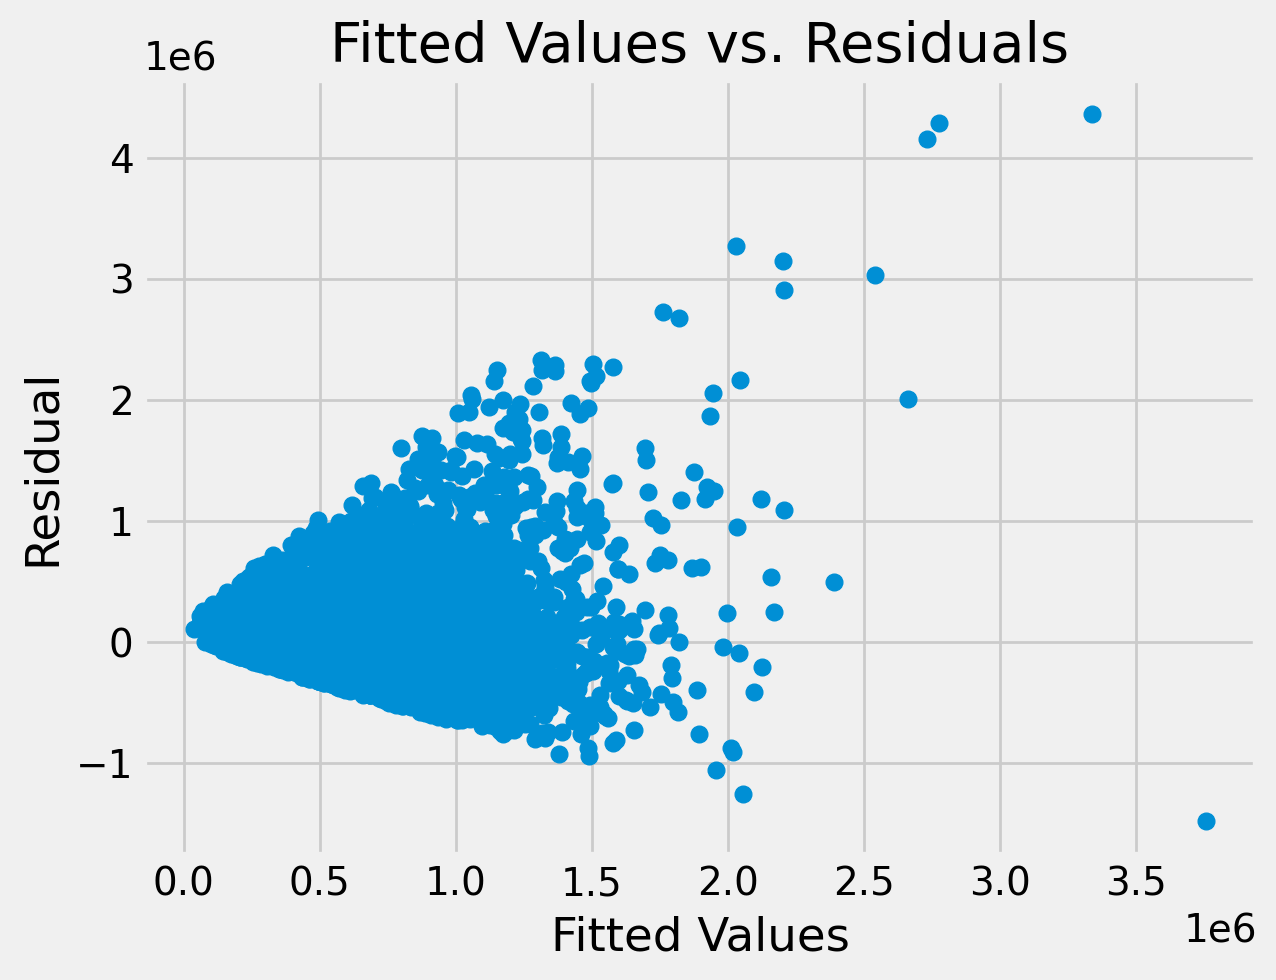

In [23]:
# Residual plot showing non-constant variance of residuals

f = "price~sqft_living"
model2 = smf.ols(formula=f, data=df).fit()
p2 = model2.fittedvalues
res2 = model2.resid
plt.scatter(p2, res2)
plt.xlabel("Fitted Values")
plt.ylabel("Residual")
plt.title("Fitted Values vs. Residuals")

Transformation: ${log(price)}$
- Applying log transformation will make the variance constant as shown in the example below

Text(0.5, 1.0, 'Fitted Values vs. Residuals')

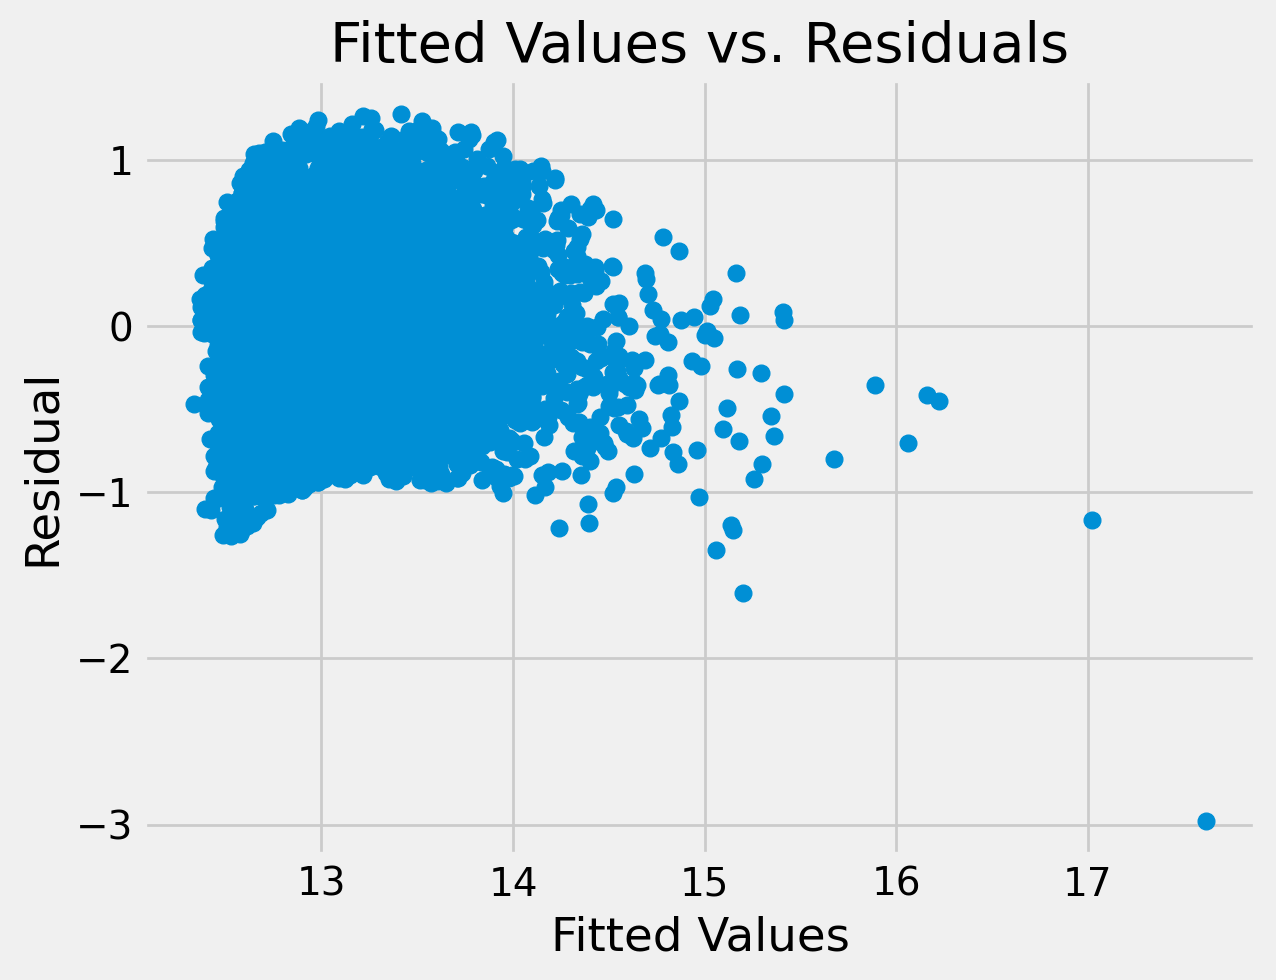

In [24]:
# Residual plot after applying log transformation

f1 = "log_price~sqft_living"
model3 = smf.ols(formula=f1, data=df).fit()
p3 = model3.fittedvalues
res3 = model3.resid
plt.scatter(p3, res3)
plt.xlabel("Fitted Values")
plt.ylabel("Residual")
plt.title("Fitted Values vs. Residuals")

### It's pretty cool how we use tranformations to work around assumption violations in regression

We apply a nonlinear transformation to the independent and/or dependent variable when we encounter violations in Normality, Homoscedasticity, and linearity.

## Topic 3 - Multicollinearity Problem

In [28]:
# Load Credit Card data

credit = pd.read_csv("Credit.csv")
credit["Income"] = pd.to_numeric(credit["Income"])

In [29]:
# Describe credit data

credit.head()

,Unnamed: 0,Income,Limit,Rating,Cards,Age,Education,Gender,Student,Married,Ethnicity,Balance
0,1,14.891,3606,283,2,34,11,Male,No,Yes,Caucasian,333
1,2,106.025,6645,483,3,82,15,Female,Yes,Yes,Asian,903
2,3,104.593,7075,514,4,71,11,Male,No,No,Asian,580
3,4,148.924,9504,681,3,36,11,Female,No,No,Asian,964
4,5,55.882,4897,357,2,68,16,Male,No,Yes,Caucasian,331


In [31]:
# Fit balance with three predictors - Limit, Rating, Age

model =smf.ols('Balance ~ Limit + Rating + Age',data=credit).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                Balance   R-squared:                       0.754
Model:                            OLS   Adj. R-squared:                  0.752
Method:                 Least Squares   F-statistic:                     403.7
Date:                Thu, 13 Oct 2022   Prob (F-statistic):          4.84e-120
Time:                        12:25:40   Log-Likelihood:                -2739.2
No. Observations:                 400   AIC:                             5486.
Df Residuals:                     396   BIC:                             5502.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   -259.5175     55.882     -4.644      0.000    -369.380    -149.655
Limit          0.0190      0.063      0.302      0.763      -0.105       0.143
Rating         2.3105      0.940      2.459      0.014       0.463       4.158
Age           -2.3458      0.669     -3.508      0.001      -3.660      -1.031
==============================================================================
Omnibus:                       20.764   Durbin-Watson:                   1.962
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               33.727
Skew:                           0.360   Prob(JB):                     4.74e-08
Kurtosis:                       4.227   Cond. No.                     2.58e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.58e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [32]:
# Fit model without Limit

model =smf.ols('Balance~Rating + Age ',data=credit).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                Balance   R-squared:                       0.754
Model:                            OLS   Adj. R-squared:                  0.752
Method:                 Least Squares   F-statistic:                     606.9
Date:                Thu, 13 Oct 2022   Prob (F-statistic):          1.82e-121
Time:                        12:26:02   Log-Likelihood:                -2739.2
No. Observations:                 400   AIC:                             5484.
Df Residuals:                     397   BIC:                             5496.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   -269.5811     44.806     -6.017      0.000    -357.668    -181.494
Rating         2.5933      0.074     34.840      0.000       2.447       2.740
Age           -2.3508      0.668     -3.521      0.000      -3.663      -1.038
==============================================================================
Omnibus:                       20.938   Durbin-Watson:                   1.963
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               34.510
Skew:                           0.358   Prob(JB):                     3.21e-08
Kurtosis:                       4.249   Cond. No.                     1.53e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.53e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### Whether we include limit or not, influences the test results significantly
* Test statistic changes


* Std error of the predictor changes significantly (~15 times in this example)

What could be the issue?

### Symptoms of Multicollinearity
* Unreliable test results due to increase in standard deviation of coefficients


* Coefficient estimates can swing wildly


How do we confirm if it is a multicollinearity issue?

* Heatmap


* VIF score

<AxesSubplot:>

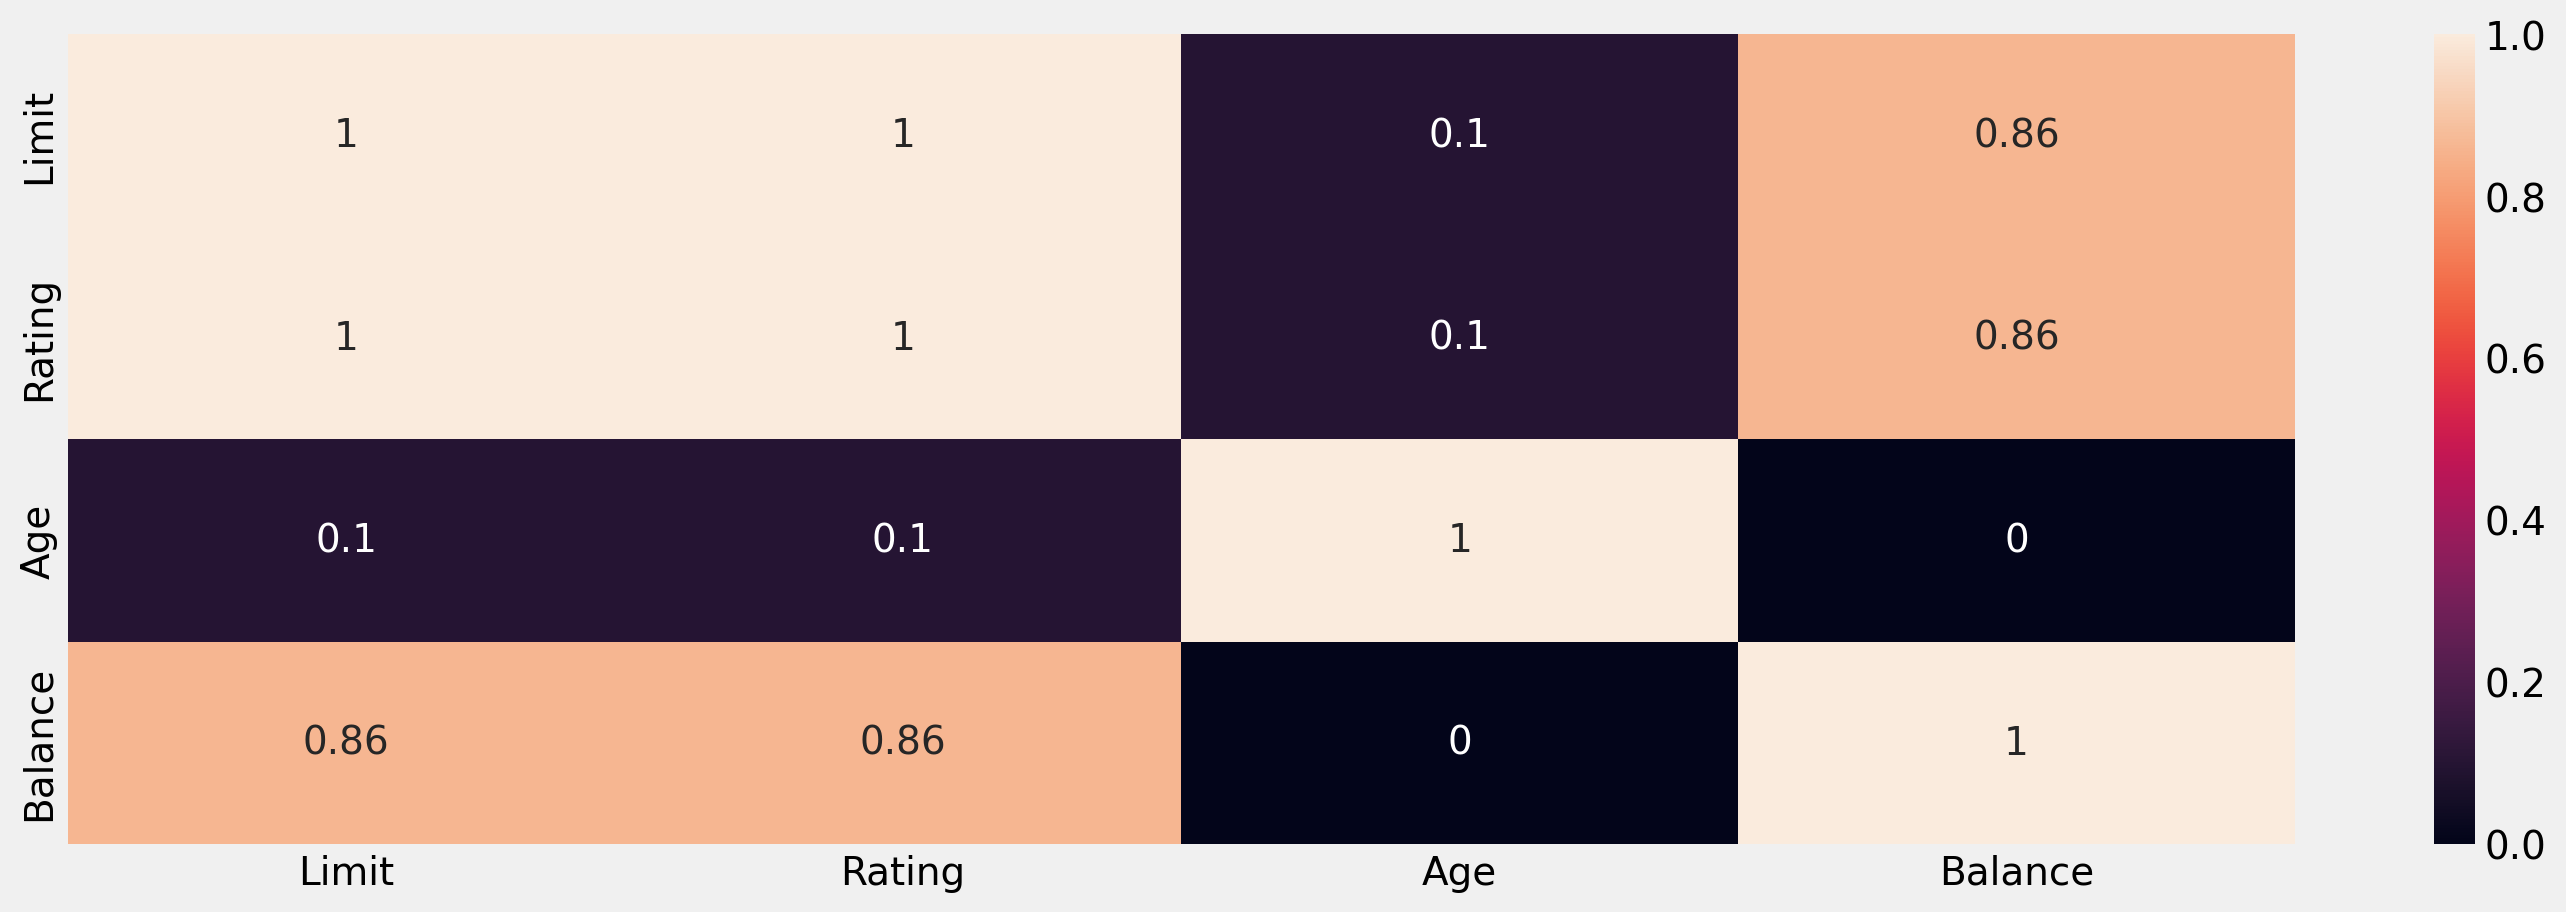

In [34]:
# Heatmap to confirm multicollinearity

df = credit[["Limit", "Rating", "Age", "Balance"]]

correlation_matrix = df.corr().round(2)
plt.figure(figsize=(16, 5))
sns.heatmap(data=correlation_matrix, annot=True)

In [35]:
# VIF to confirm multicollinearity

from statsmodels.stats.outliers_influence import variance_inflation_factor
from patsy import dmatrices
y, X = dmatrices('Balance~Limit + Rating + Age', data=df, return_type='dataframe')

vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif["features"] = X.columns
print(vif)

   VIF Factor   features
0   23.802955  Intercept
1  160.592880      Limit
2  160.668301     Rating
3    1.011385        Age


#### Abnormal VIF scores (>10) for Limit and Rating confirms multicollinearity in the model

### Potential solutions to fix multicollinearity
* Drop one of the predictors with high correlation based on business context

* Linearly combine the predictors

##### Current soultion - Proceed to drop Limit and re-fit the model. As, rating is more important to Balance, than Limit.

QQ. Can you linearly combine the predictors in this case?

No. We can combine predictors only when the combination makes sense
* Example 1 - height, depth, breadth (All are same scale)
* Example 2 - BMI instead of height and weight (contextual metric)

##### VIF for rating decreases significantly after removing its correlated predictor

In [36]:
# VIF after dropping Limit

y, X = dmatrices("Balance~Rating + Age", data=df, return_type="dataframe")
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif["features"] = X.columns
print(vif)

   VIF Factor   features
0   15.337509  Intercept
1    1.010758     Rating
2    1.010758        Age


### Too many problems? Why is Linear Regression relevant?
* Implementation is fast and efficient; Very low computational requirement


* Interpretability is very high compared to other black box models


* Supported by statistically rich reporting; Generates insightful results ranging from significance of coefficients, variance, partial regression, residual plots and influence measures

Above are main reasons for linear regression being used widespread

## Linear regression can be used beyond prediction

### Marketing Mix Modelling
- Understand the relationship between advertising spending and revenue


- Understand promotion response and re-allocate budget from low ROI channels to high ROI channels

Highly relevant in medicine, sales forecasting and many other industries..

## QQ. Wow, is there anything that linear regression can't do? 

However, Linear Regression has its own setbacks. For example, it over-simplifies the problem at hand, sensitive to outliers and operates on various assumptions. 



Best part is that there are treatments for some of these problems which allow us to implement this simple, yet powerful method.